In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
# We change the default level of the logger so that
# we can see what's happening with caching.
import logging, sys, os
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

import py21cmfast as p21c

# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting

# For interacting with the cache
from py21cmfast import cache_tools

/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
print(f"Using 21cmFAST version {p21c.__version__}")

Using 21cmFAST version 3.2.1.dev31+gabc7674.d20221001


In [3]:
if not os.path.exists('_cache'):
    os.mkdir('_cache')

p21c.config['direc'] = '_cache'
cache_tools.clear_cache(direc="_cache")

2022-10-01 07:47:01,121 | INFO | Removing IonizedBox_2102d862768d4ada023847356c34503b_r54321.h5
2022-10-01 07:47:01,124 | INFO | Removing IonizedBox_15ba5a5b3c00be6abc77b66908fa0d02_r872351358451.h5
2022-10-01 07:47:01,132 | INFO | Removing BrightnessTemp_8eb3b46a1f426e3488584bbd83d62d5f_r872351358451.h5
2022-10-01 07:47:01,134 | INFO | Removing TsBox_7f14add80f696d2de23e42779a90d793_r54321.h5
2022-10-01 07:47:01,137 | INFO | Removing IonizedBox_ded4eabf795c366eae9cae71a80932e3_r54321.h5
2022-10-01 07:47:01,138 | INFO | Removing PerturbedField_bc4e412c7a4ff31970ac28206c95a7e6_r872351358451.h5
2022-10-01 07:47:01,141 | INFO | Removing IonizedBox_808f7b1b3393c9a4075aa1d96bc4c37f_r54321.h5
2022-10-01 07:47:01,143 | INFO | Removing TsBox_22f74ebb582de95ec8cc31bf61feaad4_r54321.h5
2022-10-01 07:47:01,145 | INFO | Removing BrightnessTemp_475b91f7f184d467efe977aae66179dc_r872351358451.h5
2022-10-01 07:47:01,149 | INFO | Removing IonizedBox_af10d8b8ae0de62afaa666adf3848061_r54321.h5
2022-10-01

# Initial Conditions

The first step is to get the initial conditions, which defines the cosmological density field before any redshift evolution is applied.

In [4]:
initial_conditions = p21c.initial_conditions(
    user_params = {"HII_DIM": 100, "BOX_LEN": 100},
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8, ),
    random_seed=54321
)

/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


In [5]:
p21c.CosmoParams._defaults_

{'SIGMA_8': 0.8102,
 'hlittle': 0.6766,
 'OMm': 0.30964144154550644,
 'OMb': 0.04897468161869667,
 'POWER_INDEX': 0.9665}

In [6]:
initial_conditions.cosmo_params

CosmoParams(OMb:0.04897, OMm:0.3096, POWER_INDEX:0.9665, SIGMA_8:0.8, hlittle:0.6766)

In [7]:
initial_conditions.cosmo_params.cosmo

FlatLambdaCDM(name="Planck15 (modified)", H0=67.66 km / (Mpc s), Om0=0.30964144154550644, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897468161869667)

In [8]:
print(initial_conditions)

InitialConditions(UserParams(BOX_LEN:100, DIM:300, FAST_FCOLL_TABLES:False, HII_DIM:100, HMF:1, MINIMIZE_MEMORY:False, NO_RNG:False, N_THREADS:1, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False);
	CosmoParams(OMb:0.04897, OMm:0.3096, POWER_INDEX:0.9665, SIGMA_8:0.8, hlittle:0.6766);
	random_seed:54321)


In [9]:
initial_conditions.fieldnames

['lowres_density',
 'lowres_vx',
 'lowres_vy',
 'lowres_vz',
 'lowres_vx_2LPT',
 'lowres_vy_2LPT',
 'lowres_vz_2LPT',
 'hires_density',
 'hires_vx',
 'hires_vy',
 'hires_vz',
 'hires_vx_2LPT',
 'hires_vy_2LPT',
 'hires_vz_2LPT',
 'lowres_vcb']

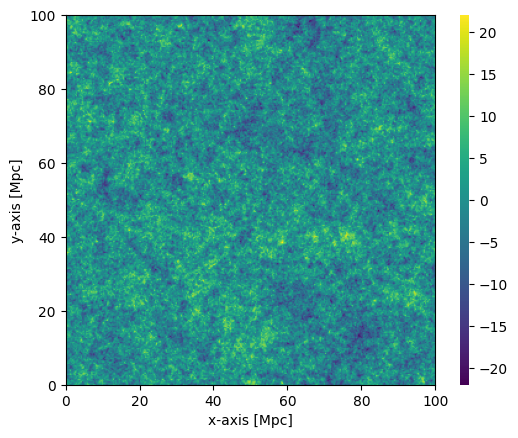

In [10]:
plotting.coeval_sliceplot(initial_conditions, "hires_density");

After obtaining the initial conditions, we need to perturb the field to a given redshift (i.e. the redshift we care about). This step clearly requires the results of the previous step, which we can easily just pass in. Let’s do that:

In [11]:
perturbed_field = p21c.perturb_field(
    redshift = 8.0,
    init_boxes = initial_conditions
)

In [12]:
perturbed_field.fieldnames

['density', 'velocity']

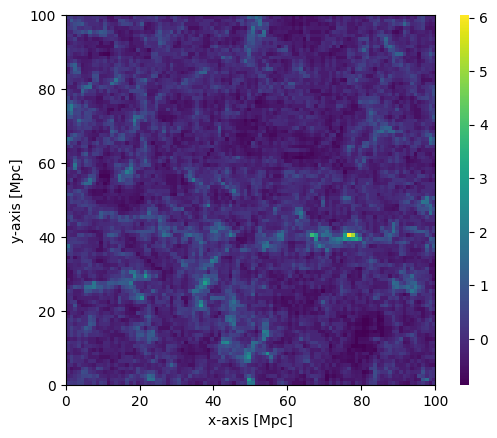

In [13]:
plotting.coeval_sliceplot(perturbed_field, "density");

# Ionization Field

Next, we need to ionize the box. This is where things get a little more tricky. In the simplest case (which, let’s be clear, is what we’re going to do here) the ionization occurs at the saturated limit, which means we can safely ignore the contribution of the spin temperature. This means we can directly calculate the ionization on the density/velocity fields that we already have. A few more parameters are needed here, and so two more “input parameter dictionaries” are available, astro_params and flag_options. Again, a reminder that their parameters can be viewed by using eg. help(p21c.AstroParams), or by looking at the API docs.

In [14]:
ionized_field = p21c.ionize_box(
    perturbed_field = perturbed_field
)

The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


In [15]:
ionized_field.fieldnames

['first_box',
 'mean_f_coll',
 'mean_f_coll_MINI',
 'log10_Mturnover_ave',
 'log10_Mturnover_MINI_ave',
 'xH_box',
 'Gamma12_box',
 'MFP_box',
 'z_re_box',
 'dNrec_box',
 'temp_kinetic_all_gas',
 'Fcoll',
 'Fcoll_MINI']

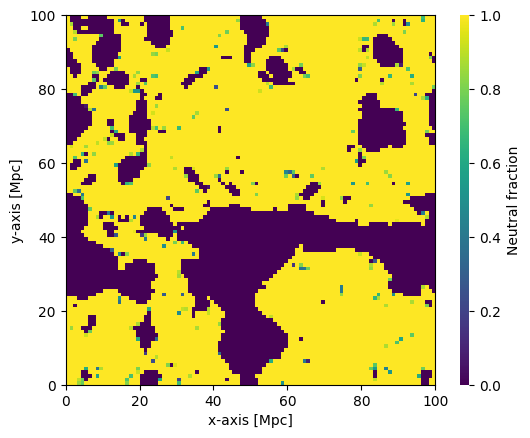

In [16]:
plotting.coeval_sliceplot(ionized_field, "xH_box");

# Brightness Temperature¶

Now we can use what we have to get the brightness temperature:

In [17]:
brightness_temp = p21c.brightness_temperature(ionized_box=ionized_field, perturbed_field=perturbed_field)

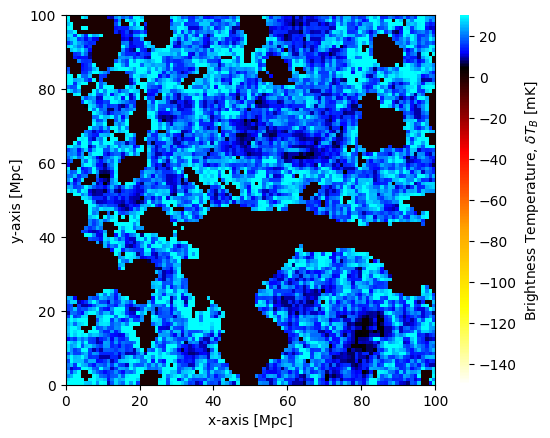

In [18]:
plotting.coeval_sliceplot(brightness_temp);

# Using the automatic cache

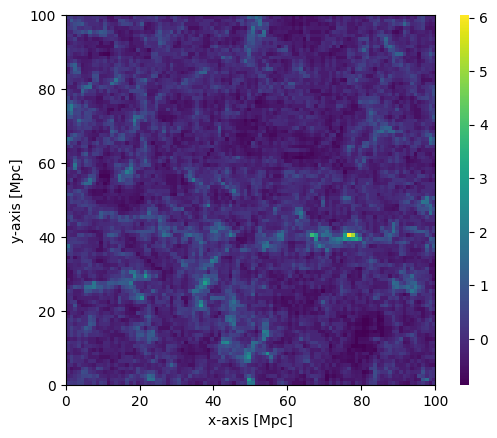

In [19]:
perturbed_field = p21c.perturb_field(
    redshift = 8.0,
    user_params = {"HII_DIM": 100, "BOX_LEN": 100},
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8),
)
plotting.coeval_sliceplot(perturbed_field, "density");

Note that here we pass exactly the same parameters as were used in the previous section. It gives a message that the full box was found in the cache and immediately returns. However, if we change the redshift:

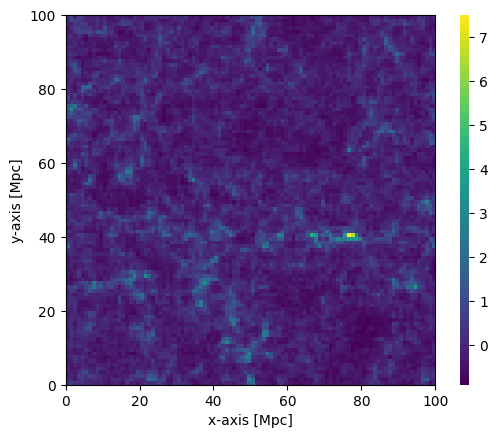

In [20]:
perturbed_field = p21c.perturb_field(
    redshift = 7.0,
    user_params = {"HII_DIM": 100, "BOX_LEN": 100},
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8),
)
plotting.coeval_sliceplot(perturbed_field, "density");

In [21]:
spin_temp = p21c.spin_temperature(
    perturbed_field = perturbed_field,
    zprime_step_factor=1.05,
)

The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The followin

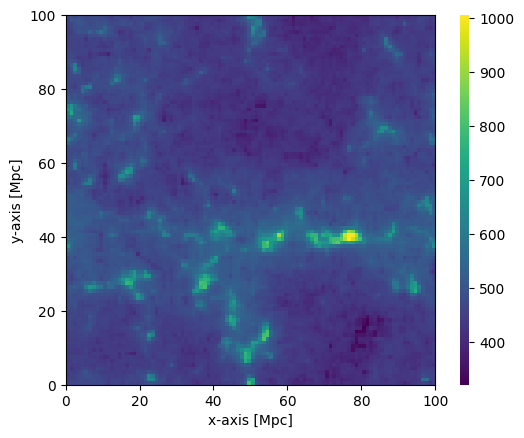

In [22]:
plotting.coeval_sliceplot(spin_temp, "Ts_box");

Now if we calculate the ionized box, ensuring that it uses the spin temperature, then it will also need to be evolved. However, due to the fact that we cached each of the spin temperature steps, these should be read in accordingly:

In [23]:
ionized_box = p21c.ionize_box(
    spin_temp = spin_temp,
    zprime_step_factor=1.05,
)

The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The followin

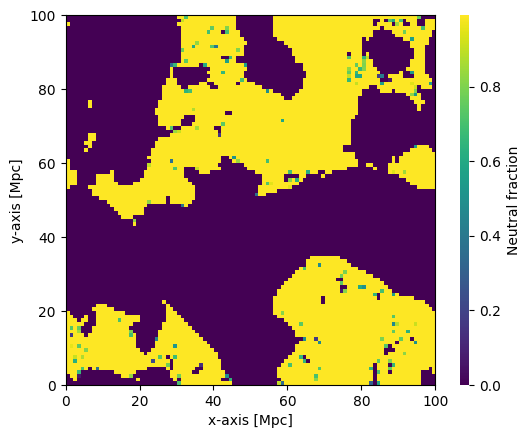

In [24]:
 plotting.coeval_sliceplot(ionized_box, "xH_box");

In [25]:
brightness_temp = p21c.brightness_temperature(
    ionized_box = ionized_box,
    perturbed_field = perturbed_field,
    spin_temp = spin_temp
)

Now lets plot our brightness temperature, which has been evolved from high redshift with spin temperature fluctuations:

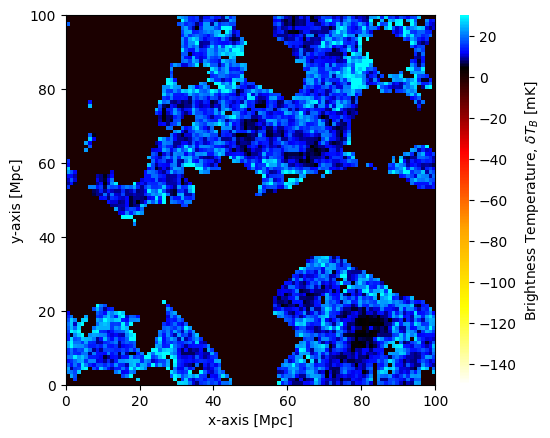

In [26]:
plotting.coeval_sliceplot(brightness_temp);

In [27]:
brightness_temp.astro_params

AstroParams(ALPHA_ESC:-0.5, ALPHA_STAR:0.5, ALPHA_STAR_MINI:0.5, A_LW:2, A_VCB:1, BETA_LW:0.6, BETA_VCB:1.8, F_ESC10:0.1, F_ESC7_MINI:0.01, F_H2_SHIELD:0, F_STAR10:0.05012, F_STAR7_MINI:0.01, HII_EFF_FACTOR:30, ION_Tvir_MIN:50000, L_X:1e+40, L_X_MINI:1e+40, M_TURN:5.012e+08, NU_X_THRESH:500, N_RSD_STEPS:20, R_BUBBLE_MAX:15, X_RAY_SPEC_INDEX:1, X_RAY_Tvir_MIN:50000, t_STAR:0.5)

In [28]:
brightness_temp.redshift

7.0

We can also check what the result would have been if we had limited the maximum redshift of heating. Note that this recalculates all previous spin temperature and ionized boxes, because they depend on both z_heat_max and zprime_step_factor.

The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The followin

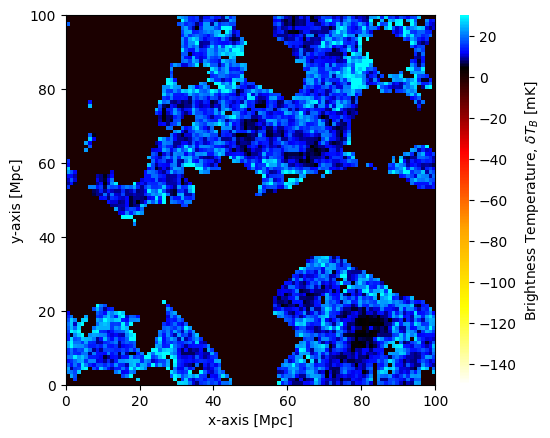

In [29]:
ionized_box = p21c.ionize_box(
    spin_temp = spin_temp,
    zprime_step_factor=1.05,
    z_heat_max = 20.0
)

brightness_temp = p21c.brightness_temperature(
    ionized_box = ionized_box,
    perturbed_field = perturbed_field,
    spin_temp = spin_temp
)

plotting.coeval_sliceplot(brightness_temp);

# Running and Plotting LightCones¶

This tutorial follows on from the coeval cube tutorial, and provides an introduction to creating lightcones with 21cmFAST. If you are new to 21cmFAST you should go through the coeval cube tutorial first.

There are two ways of creating lightcones in 21cmFAST: manual and automatic. The manual way involves evolving a coeval simulation through redshift and saving slices of it into a lightcone array. The advantage of this method is that one can precisely choose the redshift nodes to simulate and decide on interpolation methods. However, in this tutorial, we will focus on the single function that is included to do this for you: run_lightcone.

The function takes a few different arguments, most of which will be familiar to you if you’ve gone through the coeval tutorial. All simulation parameters can be passed (i.e. user_params, cosmo_params, flag_options and astro_params). As an alternative to the first two, an InitialConditions and/or PerturbField box can be passed.

Furthermore, the evolution can be managed with the zprime_step_factor and z_heat_max arguments.

Finally, the final minimum redshift of the lightcone is set by the redshift argument, and the maximum redshift of the lightcone is defined by the max_redshift argument (note that this is not the maximum redshift evaluated, which is controlled by z_heat_max, merely the maximum saved into the returned lightcone).

You can specify which 3D quantities are interpolated as lightcones, and which should be saved as global parameters.

Let’s see what it does. We won’t use the spin temperature, just to get a simple toy model:

In [30]:
lightcone = p21c.run_lightcone(
    redshift = 7.0,
    max_redshift = 12.0,
    user_params = {"HII_DIM":150, "BOX_LEN": 600},
    lightcone_quantities=("brightness_temp", 'density'),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_cache'
)

The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/_utils.py:821: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/_utils.py:821: UserWarning: Trying to remove array that isn't yet created: hires_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/_utils.py:821: UserWarning: Trying to remove array that isn't yet created: hires_vz
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-pa

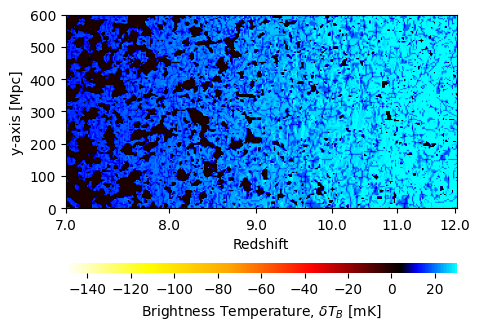

In [31]:
plotting.lightcone_sliceplot(lightcone);

(<Figure size 504.5x475 with 2 Axes>,
 <AxesSubplot: xlabel='Redshift', ylabel='y-axis [Mpc]'>)

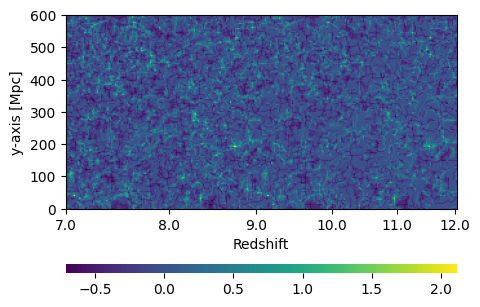

In [32]:
plotting.lightcone_sliceplot(lightcone, "density")

Simple!

You can also save lightcones:

In [33]:
filename = lightcone.save(direc='_cache')

In [34]:
print(os.path.basename(filename))

LightCone_z7.0_52c2367f8e94f3c2a8c47b1d6d1fdeae_r872351358451.h5


In [35]:
# Fidutial and lighcones (careful broke the kernel)

In [4]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
EoR_colour = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap',\
             [(0, 'white'),(0.33, 'yellow'),(0.5, 'orange'),(0.68, 'red'),\
              (0.83333, 'black'),(0.9, 'blue'),(1, 'cyan')])
plt.register_cmap(cmap=EoR_colour)

In [5]:
output_dir = '/media/mardom/_store/mardom/aida/hybrid/mini-halos/'
HII_DIM = 128
BOX_LEN = 250

random_seed = 1993
# USE_FFTW_WISDOM make FFT faster
user_params = {"HII_DIM":HII_DIM, "BOX_LEN": BOX_LEN, "USE_FFTW_WISDOM": True}

initial_conditions = p21c.initial_conditions(user_params=user_params,random_seed=random_seed, direc=output_dir)

/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


Let’s run a ‘fiducial’ model and see its lightcones

Note that the reference model has

The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
2022-10-01 07:47:35,066 | WARNING | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/_utils.py:821: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/_utils.py:821: UserWarning: Trying to remove array that isn't yet created: hires_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/mardom/anaconda3/envs/21cm/lib/python3.8/site-packages/21cmFAST-3.2.1.dev31+gabc7674.d20221001-py3.8-linux-x86_64.egg/py21cmfast/_utils.py:821: UserWarning: Trying to remove array that isn't yet created: hires_vz
  warnings.warn(

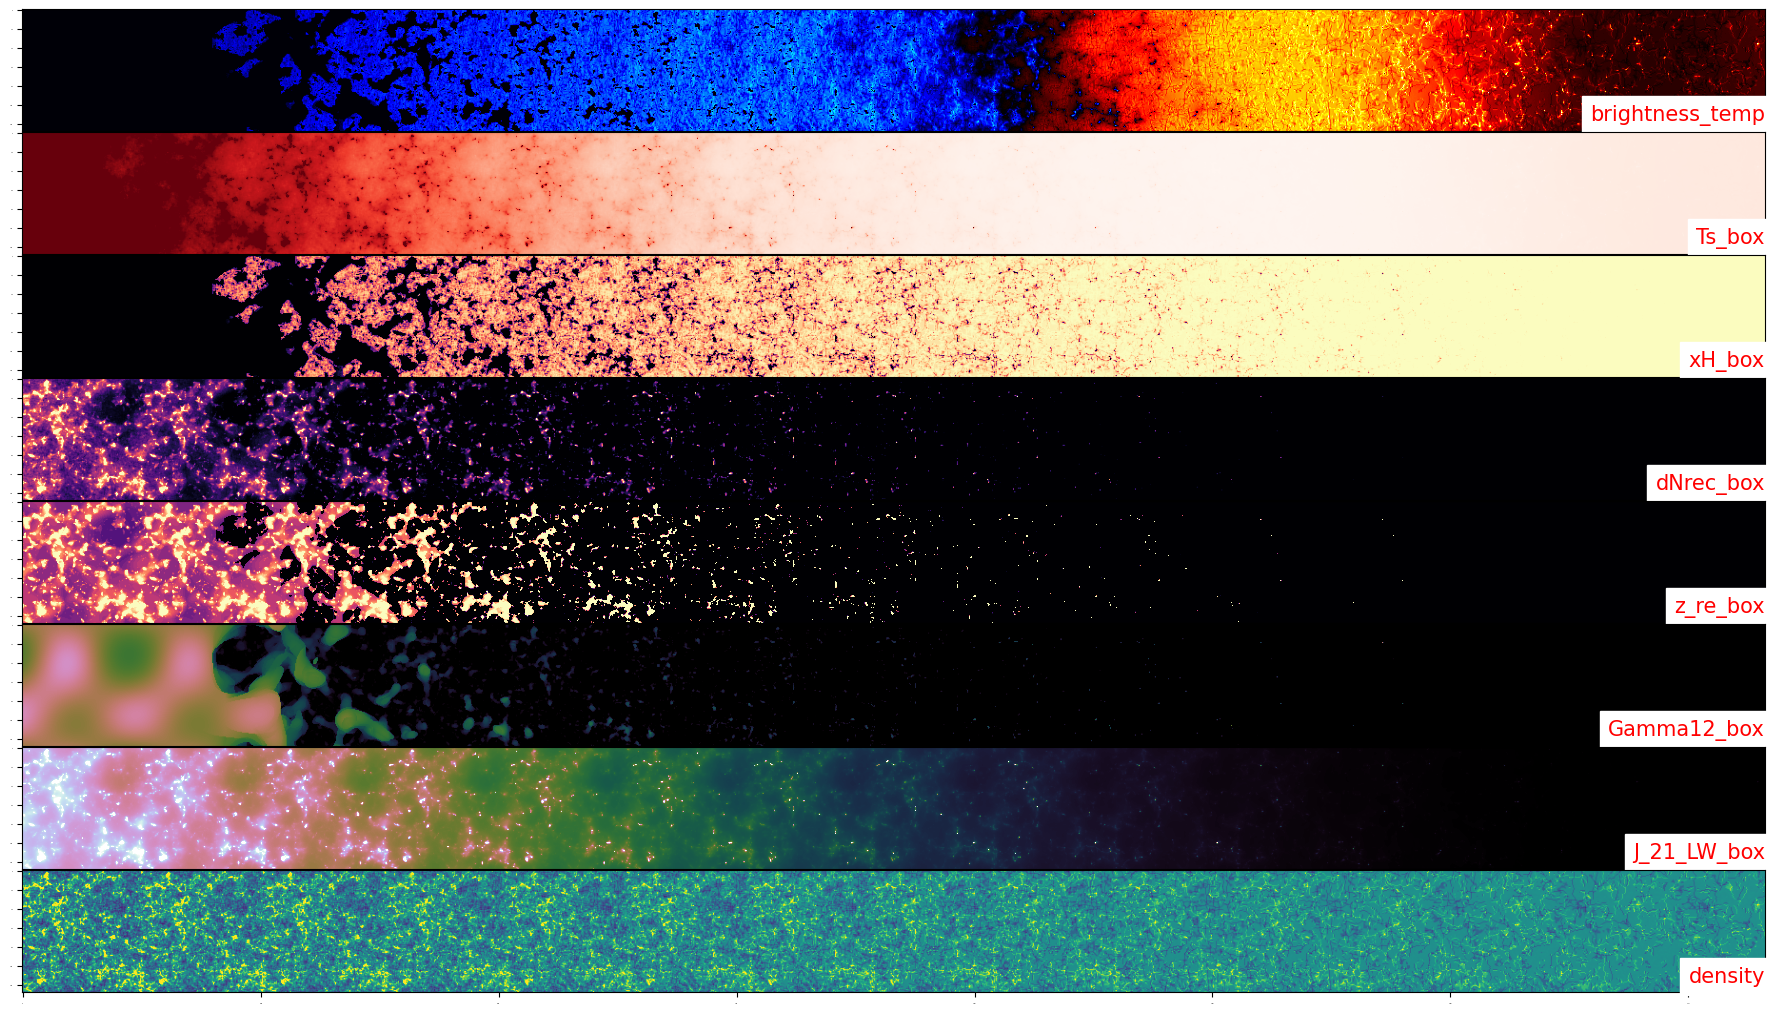

In [6]:
# the lightcones we want to plot later together with their color maps and min/max
lightcone_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
cmaps = [EoR_colour,'Reds','magma','magma','magma','cubehelix','cubehelix','viridis']
vmins = [-150, 1e1, 0, 0, 5, 0, 0, -1]
vmaxs = [  30, 1e3, 1, 2, 9, 1,10,  1]

# set necessary flags for using minihalos and astro parameter
astro_params_fid = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
                    'ALPHA_STAR': 0.5,'F_STAR10': -1.25, 'F_STAR7_MINI': -1.75,
                    'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 500.0, 'F_H2_SHIELD': 0.0}
flag_options_fid = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 'USE_MINI_HALOS':True}

lightcone_fid = p21c.run_lightcone(
        redshift = 5.5,
        init_box = initial_conditions,
        flag_options = flag_options_fid,
        astro_params = astro_params_fid,
        lightcone_quantities=lightcone_quantities,
        global_quantities=lightcone_quantities,
        random_seed = random_seed,
        direc = output_dir
)

fig, axs = plt.subplots(len(lightcone_quantities),1,
            figsize=(getattr(lightcone_fid, lightcone_quantities[0]).shape[2]*0.01,
                     getattr(lightcone_fid, lightcone_quantities[0]).shape[1]*0.01*len(lightcone_quantities)))
for ii, lightcone_quantity in enumerate(lightcone_quantities):
    axs[ii].imshow(getattr(lightcone_fid, lightcone_quantity)[1],
                   vmin=vmins[ii], vmax=vmaxs[ii],cmap=cmaps[ii])
    axs[ii].text(1, 0.05, lightcone_quantity,horizontalalignment='right',verticalalignment='bottom',
            transform=axs[ii].transAxes,color = 'red',backgroundcolor='white',fontsize = 15)
    axs[ii].xaxis.set_tick_params(labelsize=0)
    axs[ii].yaxis.set_tick_params(labelsize=0)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.01)

In [ ]:
# Changing to Tools21cm for visualization and telescope calculations

In [ ]:
import tools21cm as t2c

import warnings
warnings.filterwarnings("ignore")
